# DS3000 Day 8

Oct 10, 2023

Admin
- Qwickly Attendance (PIN on board)
- Homework 2 due by **midnight Tonight**
  - Part 1.5 is **not** extra credit (it *was*)
- Homework 3 will be posted then, due **Oct 31**
  - Please do start this one earlier rather than later...
- Project Proposals due by **next Tuesday**
  - Example proposal on Canvas. *Obviously* do not just copy it... especially because you are not allowed to use the Spotify API.
  - Please let me know if you'd like to work with someone by **next Thurs/Friday**. I will post a list of all proposals for your section on Wednesday for those who want to see if anyone had a similar idea to them wants to work together. Anyone who is not in a group by class time Thurs/Friday will be randomly assigned to groups.
- Quiz 2 will be assigned **next Tuesday**
  - Due one week later, on **Oct 24**
- Visitor and Lab **next Tuesday**
  - Visitor: Arielle Dror, NWSL
  - Lab: Covers Cleaning, Graphing, and Summarizing Data

Push-Up Tracker
- Section 04: 5
- Section 05: 8
- Section 06: 7

Content:
- Wrap up Correlation discussion
- Vector Geometry Basics
  - By Hand and In Python
- Next time: Ethics and Machine Learning Intro

In [7]:
# packages for today
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import requests
from bs4 import BeautifulSoup
import pandas as pd?
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
import plotly.express as px 

### Co-variance & correlation: Qualitatively
(How two values vary together)

The behavior between any two values x and y can be summarized in one of the three ways:
1. as x gets larger y typically gets larger too
    - ex: 
        - `x=temp on some day`
        - `y=number of people on the beach on the same day`
    - covariance & correlation is positive
2. as x gets larger y typically doesn't get larger or smaller
    - ex: 
        - `x=individual's favorite number`
        - `y=number of hot dogs that individual has eaten in their lifetime`
    - covariance & correlation is zero
3. as x gets larger, y typically gets smaller
    - ex: 
        - `x=average speed of driver on 10 mile commute`
        - `y=average commute time of driver on 10 mile commute`
    - covariance & correlation are negative

Covariance & Correlation are only defined between two values when the observations are somehow **linked**:
1. on the same **day**, we observe temp & beach population
1. on the same **individual**, we observe favortie number & hot dogs eaten
1. on the same **driver**, we observe speed and commute time

If we don't observe the data in pairs, correlation / covariance is not defined:
- `x=an individual's favorite number`
- `y=the temperature on a given day`

`x` is observed per individual while `y` is observed per day ... there isn't a way to "pair" every x with a y!

In [8]:
import pandas as pd 

df_poke = pd.read_csv('pokedata.csv')

# use .rename to make all the column names lower case
# we can also pass a function which operates on each index / column
def make_lower(x):
    return str(x).lower()
df_poke.rename(make_lower, axis = 1, inplace=True)

# set the index to the pokedex number
df_poke.set_index('pokedex', inplace=True)

df_poke.iloc[:,3:].cov()

,height,weight,damage,basespeed,attack,defense
height,1434.948698,2812.923275,263.536645,202.599603,313.770817,366.510684
weight,2812.923275,17239.445888,1673.129204,185.234597,1605.373603,1452.893957
damage,263.536645,1673.129204,817.131921,-31.478764,226.885607,92.157130
basespeed,202.599603,185.234597,-31.478764,715.395585,144.560927,-38.338322
attack,313.770817,1605.373603,226.885607,144.560927,715.852539,347.606181
defense,366.510684,1452.893957,92.157130,-38.338322,347.606181,724.508962


## Computing Co-variance ("by hand")

**Goal**: 

compute the covariance of x and y below:

In [11]:
df_car = pd.DataFrame({'car weight (x)': [-2, -1, 0, 1, 2],
                       'mpg (y)': [4, 2, 0, -2, -4]},
                      index=['car0', 'car1', 'car2', 'car3', 'car4'])
df_car

,car weight (x),mpg (y)
car0,-2,4
car1,-1,2
car2,0,0
car3,1,-2
car4,2,-4


**Sample covariance:**
$$ \texttt{cov}(x, y) = \frac{1}{N-1} \sum_i (x_i - \bar{x})(y_i - \bar{y})$$


**Compute:**

|      | x | y | $$ x_i - \bar{x}$$ | $$y - \bar{y}$$ | $$ (x_i - \bar{x})(y - \bar{y})$$ |
|-----:|---------------:|--------:|--------------------|-----------------|-----------------------------------|
| car0 |              -2 |       4 | -2                 | 4               | -8                                |
| car1 |              -1 |       2 | -1                 | 2               | -2                                |
| car2 |              0 |       0 | 0                  | 0               | 0                                 |
| car3 |              1 |       -2 | 1                  | -2              | -2                                |
| car4 |              2 |       -4 | 2                  | -4              | -8                                |

In [12]:
num_car = 5
sample_cov = (-8 -2 +0 -2 -8) / (num_car - 1)
sample_cov

-5.0

## Anatomy of a Covariance Matrix (computing covariance via computer)

In [13]:
# returns a full covariance matrix
df_car.cov()

,car weight (x),mpg (y)
car weight (x),2.5,-5.0
mpg (y),-5.0,10.0


A covariance matrix contains the covariance of every pair of elements:
    
|   |         x |         y |
|--:|----------:|----------:|
| x | cov(x, x) | cov(x, y) |
| y | cov(y, x) | cov(y, y) |

- Note 1: cov(x, y) = cov(y, x) (always, not just in this example)
- Note 2: cov(x, x) is the variance of x and itself

In [14]:
# variance diagonal of the covariance matrix
df_car.var()

car weight (x)     2.5
mpg (y)           10.0
dtype: float64

## Correlation (motivation)

Covariance by itself is not actually very useful, since the units are not (usually) interpretable. Instead, we usually use correlation.

Which has a more consistent relationship? (or maybe they're the same?)
- height of a person in `inches`
- height of a person in `cm`

or
- height of a person in `inches`
- height of a person in `feet`

In [15]:
inch_to_cm = 2.54
inch_to_feet = 1/12

df_height = pd.DataFrame({'height_inches': [68, 69, 70, 72, 55, 77]})
df_height['height_cm'] = df_height['height_inches'] * inch_to_cm
df_height['height_feet'] = df_height['height_inches'] * inch_to_feet

df_height

,height_inches,height_cm,height_feet
0,68,172.72,5.666667
1,69,175.26,5.750000
2,70,177.80,5.833333
3,72,182.88,6.000000
4,55,139.70,4.583333
5,77,195.58,6.416667


In [16]:
df_height.cov()

,height_inches,height_cm,height_feet
height_inches,53.900000,136.906000,4.491667
height_cm,136.906000,347.741240,11.408833
height_feet,4.491667,11.408833,0.374306


- Covariance between `height_inches` and `height_cm` ~= 136
- Covariance between `height_inches` and `height_feet` ~= 4

So is there a stronger relationship between `height_inches` and `height_cm`? ...

<Axes: xlabel='height_inches', ylabel='height_cm'>

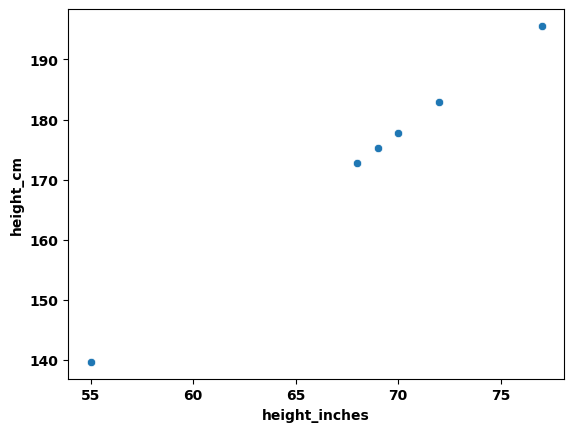

In [17]:
sns.scatterplot(data=df_height, x='height_inches', y='height_cm')

<Axes: xlabel='height_inches', ylabel='height_feet'>

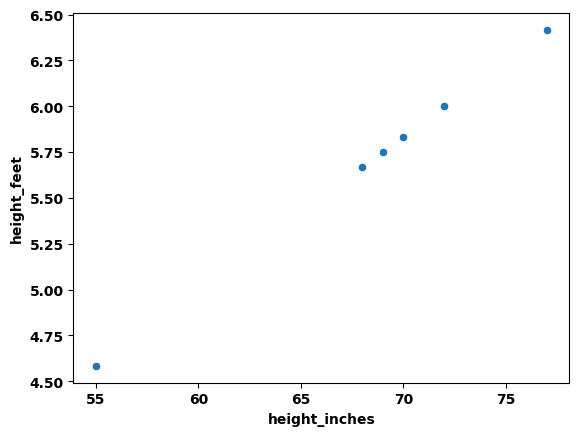

In [18]:
sns.scatterplot(data=df_height, x='height_inches', y='height_feet')

So is there a stronger relationship between `height_inches` and `height_cm`? ...

... not at all, they have the *same* relationship.  Its just that covariance depends on the units we measure in.  Smaller units -> bigger values -> bigger covariance.

## The 'strongest' relationship between two variables

In some sense, this is the 'strongest' possible relationship.  When one variable increases, the other always does so too.  

**Helpful fact:**
The covariance is always smaller than the product of the standard deviations of both variables:

$$|cov(x,y)| \leq \sigma_x \sigma_y$$

### Question: What does it mean that this is the 'strongest' possible relationship, and that the covariances are as large as they can possibly be?

In [19]:
# compute the correlation matrix (each item is correlation of that row & column)
df_height.corr()

,height_inches,height_cm,height_feet
height_inches,1.0,1.0,1.0
height_cm,1.0,1.0,1.0
height_feet,1.0,1.0,1.0


## Correlation (Compute)

Remember, the biggest (and smallest) covariance we can possibly have is the product of the standard deviations:

$$|cov(x,y)| \leq \sigma_x \sigma_y$$

Correlation: "How big of a covariance do you have comapred to how big it could possibly be?"

$$corr(x,y) = \frac{\texttt{cov}(x, y)}{\sigma_x \sigma_y} $$

In doing so, it removes any effect of the scale of the data might have (e.g. changing units).

## Let's discuss Correlation some more

Correlations are shown above each scatter (credit: wikipedia)
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png" alt="Drawing" style="width: 800px;"/>

Common misconception:

- if x and y are uncorrelated, they are independent
    - (see examples in last row directly above)

## The most important correlation/covariance slide: why did we go through all this trouble?

- mean and median describe where a feature typically is
- variance / standard deviation describes how consistently a feature stays near its mean
- correlation describes which relationship two values have:
    - when x increases, y typically increases
    - when x increases, y typically stays the same
    - when x increases, y typically decreases
    - **MOST IMPORTANTLY**: Just because two features have a correlation, **does not** mean they have anything to do with each other: [Spurious Correlations](http://www.tylervigen.com/spurious-correlations)

## Reminder: representing data (samples & features)
To describe a collection of **samples** we record a set of **features** for each sample.

For example, when describing penguins:

In [20]:
df_penguin = sns.load_dataset('penguins')
df_penguin.dropna(axis=0, inplace=True)

df_penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Each penguin is a sample for which we've observed 7 features:
- species
- island
- bill_length_mm
- bill_depth_mm
- flipper_length_mm
- body_mass_g
- sex 

A numerical dataset can be represented as an array (we'll return to those categorical variables `species`, `island` and `sex` later on). 

**By convention, sklearn (our Python ML library) represent:**
- each sample as a row 
- each feature as a column 

**as is shown above.**


## Samples as vectors

In [21]:
# only focus on numerical features (for now)
col_num_list = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df_penguin_num = df_penguin.loc[:, col_num_list]

# for pedagogical reasons, we need penguin1 to have slightly different values
df_penguin_num.iloc[1, :] = [40.2, 17.9, 194.0, 3700]

df_penguin_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,40.2,17.9,194.0,3700.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


Individual samples (penguins) are considered, mathematically, as vectors.  When sklearn looks at the first penguin it sees:

In [22]:
np.array(df_penguin_num.iloc[0, :])

array([  39.1,   18.7,  181. , 3750. ])

## Distances between samples
Many ML tools require that these vectors have meaningful distances between them.  
- A pair of samples with a large distance between them are considered different
- A pair of smaples with a small distance between them are considered similar

Computing (the $\ell_2$, or Euclidean) distance between two vectors $x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$ and $x' = \begin{bmatrix} x_1' \\ x_2' \end{bmatrix}$:

$$||x - x'||_2 = \sqrt{\sum_i (x_i - x_i')^2}$$

In words, to compute the distance between two vectors:
- we square the differences of each element
- add these values together
- compute the square root of this sum

How similar is penguin0 to penguin1?

In [23]:
penguin0 = df_penguin_num.iloc[0, :]
penguin0

bill_length_mm         39.1
bill_depth_mm          18.7
flipper_length_mm     181.0
body_mass_g          3750.0
Name: 0, dtype: float64

In [24]:
penguin1 = df_penguin_num.iloc[1, :]
penguin1

bill_length_mm         40.2
bill_depth_mm          17.9
flipper_length_mm     194.0
body_mass_g          3700.0
Name: 1, dtype: float64

In [25]:
sq_diff_per_feat = [(39.1 - 40.2) ** 2, (18.7 - 17.9) ** 2, (181 - 194) ** 2, (3750 - 3700) ** 2]
l2_dist = sum(sq_diff_per_feat) ** .5
l2_dist

51.68026702717392

In and of itself, this distance isn't too insightful ... the penguins are 50 ?unit? apart?  The value becomes more useful when compared to other distances.  Is penguin 1 more similar to penguin 0 or penguin 2?

In [26]:
vec_penguin0 = np.array(df_penguin_num.iloc[0, :])
vec_penguin1 = np.array(df_penguin_num.iloc[1, :])
vec_penguin2 = np.array(df_penguin_num.iloc[2, :])

# a quicker, equivilent way to compute distance
l2_dist_quick_a = np.linalg.norm(vec_penguin0 - vec_penguin1)
l2_dist_quick_b = np.linalg.norm(vec_penguin1 - vec_penguin2)

print(f'distance between penguin0 and penguin1: {l2_dist_quick_a:.3f}') #the .3f limits the printing to 3 decimals
print(f'distance between penguin1 and penguin2: {l2_dist_quick_b:.3f}')

distance between penguin0 and penguin1: 51.680
distance between penguin1 and penguin2: 450.001


So: penguin0 and penguin1 are more similar since we observed:

    distance between penguin0 and penguin1: 51.680
    distance between penguin1 and penguin2: 450.001
    
Is this satisfying or should penguin1 and penguin2 be considered more similar?  Lets break it out by feature:

In [19]:
df_penguin_num.iloc[1, :] - df_penguin_num.iloc[0, :]

bill_length_mm        1.1
bill_depth_mm        -0.8
flipper_length_mm    13.0
body_mass_g         -50.0
dtype: float64

In [20]:
df_penguin_num.iloc[1, :] - df_penguin_num.iloc[2, :]

bill_length_mm        -0.1
bill_depth_mm         -0.1
flipper_length_mm     -1.0
body_mass_g          450.0
dtype: float64

The bills and flippers of penguin2 and penguin1 are just about identical ... but their difference in body mass is so large that it yields a large distance.

## Big Idea: Distances assume that a change of 1 unit (in any feature) is equally significant

What if we measured the body mass of the penguin in a different unit?

In [21]:
# replace body_mass_g with body_mass_kg
df_penguin_num['body_mass_kg'] = df_penguin_num['body_mass_g'] / 1000
del df_penguin_num['body_mass_g']

df_penguin_num.head(3)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_kg
0,39.1,18.7,181.0,3.75
1,40.2,17.9,194.0,3.70
2,40.3,18.0,195.0,3.25


In [22]:
vec_penguin0 = np.array(df_penguin_num.iloc[0, :])
vec_penguin1 = np.array(df_penguin_num.iloc[1, :])
vec_penguin2 = np.array(df_penguin_num.iloc[2, :])

# a quicker, equivilent way to compute distance
l2_dist_quick_a = np.linalg.norm(vec_penguin0 - vec_penguin1)
l2_dist_quick_b = np.linalg.norm(vec_penguin1 - vec_penguin2)

print(f'distance between penguin0 and penguin1: {l2_dist_quick_a:.3f}') #the .3f limits the printing to 3 decimals
print(f'distance between penguin1 and penguin2: {l2_dist_quick_b:.3f}')

distance between penguin0 and penguin1: 13.071
distance between penguin1 and penguin2: 1.106


These numbers aren't just different, they claim an opposite conclusion: penguin1 and penguin2 are more similar!

- **Distances assume that a change of 1 unit (in any feature) is equally significant**
- **Distances implicitly weight how important each feature is relative to others according to its variance**
    - a feature with a higher variance is responsible for more of the distances
    
To wrap all the different features into a single distance we must say *something* about how important one feature is compared to another.  

In [23]:
df_penguin_num.std()

bill_length_mm        5.467070
bill_depth_mm         1.969606
flipper_length_mm    13.996877
body_mass_kg          0.805387
dtype: float64

### Scale Normalization:
How to scale your features so that they're equally important in our distance metric:

In [24]:
# by dividing each feature by the standard deviation, outputs will have same std dev
df_penguin_num_scaled = pd.DataFrame()
for feat in df_penguin_num.columns:
    df_penguin_num_scaled[f'{feat}_scaled'] = df_penguin_num[feat] / df_penguin_num[feat].std()

In [25]:
df_penguin_num_scaled.std()

bill_length_mm_scaled       1.0
bill_depth_mm_scaled        1.0
flipper_length_mm_scaled    1.0
body_mass_kg_scaled         1.0
dtype: float64

In [26]:
df_penguin_num_scaled.head(3)

,bill_length_mm_scaled,bill_depth_mm_scaled,flipper_length_mm_scaled,body_mass_kg_scaled
0,7.151911,9.494285,12.931456,4.656148
1,7.353115,9.088113,13.860235,4.594066
2,7.371407,9.138884,13.931679,4.035329


Notice that in doing so, our units are no longer valid, so lets remove the units:

In [27]:
df_penguin_num_scaled.columns = ['bill_length_scaled',
                                'bill_depth_scaled',
                                'flippter_length_scaled',
                                'body_mass_scaled']
df_penguin_num_scaled.head(3)

,bill_length_scaled,bill_depth_scaled,flippter_length_scaled,body_mass_scaled
0,7.151911,9.494285,12.931456,4.656148
1,7.353115,9.088113,13.860235,4.594066
2,7.371407,9.138884,13.931679,4.035329


Now, which penguins are actually most similar?

In [28]:
vec_penguin0 = np.array(df_penguin_num_scaled.iloc[0, :])
vec_penguin1 = np.array(df_penguin_num_scaled.iloc[1, :])
vec_penguin2 = np.array(df_penguin_num_scaled.iloc[2, :])

# a quicker, equivilent way to compute distance
l2_dist_quick_a = np.linalg.norm(vec_penguin0 - vec_penguin1)
l2_dist_quick_b = np.linalg.norm(vec_penguin1 - vec_penguin2)

print(f'distance between penguin0 and penguin1: {l2_dist_quick_a:.3f}') #the .3f limits the printing to 3 decimals
print(f'distance between penguin1 and penguin2: {l2_dist_quick_b:.3f}')

distance between penguin0 and penguin1: 1.035
distance between penguin1 and penguin2: 0.566


# What do we do with categorical features?
## One hot encoding and "Dummy" variables
### (Representing categorical variables in the sample vector as numbers)

**One hot encoding:** replace each categorical column with a set of columns per each unique category.  These new columns (called dummy variables) have value 1 where the original row belonged to the corresponding category.

In [27]:
df_penguin = sns.load_dataset('penguins')

# discard penguins with missing features
df_penguin.dropna(axis=0, inplace=True)

# shuffle order of rows
df_penguin = df_penguin.sample(frac=1, random_state=1)

# grab only the first few rows
df_penguin = df_penguin.head()

df_penguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
65,Adelie,Biscoe,41.6,18.0,192.0,3950.0,Male
276,Gentoo,Biscoe,43.8,13.9,208.0,4300.0,Female
186,Chinstrap,Dream,49.7,18.6,195.0,3600.0,Male
198,Chinstrap,Dream,50.1,17.9,190.0,3400.0,Female
293,Gentoo,Biscoe,46.5,14.8,217.0,5200.0,Female


In [28]:
pd.get_dummies(df_penguin, columns=['species'])

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo
65,Biscoe,41.6,18.0,192.0,3950.0,Male,True,False,False
276,Biscoe,43.8,13.9,208.0,4300.0,Female,False,False,True
186,Dream,49.7,18.6,195.0,3600.0,Male,False,True,False
198,Dream,50.1,17.9,190.0,3400.0,Female,False,True,False
293,Biscoe,46.5,14.8,217.0,5200.0,Female,False,False,True


In [29]:
pd.get_dummies(df_penguin, columns=['species', 'island', 'sex'], dtype='float')

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,sex_Female,sex_Male
65,41.6,18.0,192.0,3950.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
276,43.8,13.9,208.0,4300.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
186,49.7,18.6,195.0,3600.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
198,50.1,17.9,190.0,3400.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
293,46.5,14.8,217.0,5200.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


## Intro to Vector Geometry (on board and in python)

Above, we looked at representing data as vectors, and already talked about calculating distances between vectors such as  $x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$ and $x' = \begin{bmatrix} x_1' \\ x_2' \end{bmatrix}$. Data are usually represented as vectors (or matrices).

For example, the first observation in the Penguin data set, represented as a vector (excluding categorical/dummy variables) was, after scaling, and rounding to three places:

$x_1 = \begin{bmatrix} 7.152 \\ 9.494 \\ 12.931 \\ 4.656 \end{bmatrix}$

In [32]:
x1 = np.array(df_penguin_num_scaled.iloc[0, :])
x1

array([ 7.15191075,  9.49428525, 12.93145595,  4.65614842])

### Notation

Generally, we use **lowercase** letters to represent vectors, like above, and **uppercase** letters to represent matrices, such as when we consider the data set containing the first two penguins:

$X = \begin{bmatrix} 7.152 & 9.494 & 12.931 & 4.656 \\ 7.353 & 9.088 & 13.860 & 4.594 \end{bmatrix}$

Note that by convention also, vectors are **column vectors**, but that when we combine vectors into a data matrix, the vectors are included as the **rows**.

## Vector Addition

In order to add two vectors together, they must be the same **dimension**. For example, each penguin in the data set (again, discounting the categorical features) is represented by a vector of length $n = 4$:

$x_1 = \begin{bmatrix} 7.152 \\ 9.494 \\ 12.931 \\ 4.656 \end{bmatrix}$
$x_2 = \begin{bmatrix} 7.353 \\ 9.088 \\ 13.860 \\ 4.594 \end{bmatrix}$

$x_1 + x_2 = \begin{bmatrix} 14.505 \\ 18.582 \\ 26.791 \\ 9.250 \end{bmatrix}$

In [33]:
x2 = np.array(df_penguin_num_scaled.iloc[1, :])
x2

array([ 7.3531154 ,  9.08811262, 13.86023456,  4.59406644])

In [34]:
x1+x2

array([14.50502616, 18.58239787, 26.79169051,  9.25021486])

If we simplify the vectors to be two-dimensional, we can very easily understand what the vector addition operation is doing with a quick graph (done on board). Check out what it means to add the following two vectors together:


$x = \begin{bmatrix} 3 \\ 4 \end{bmatrix}$

$y = \begin{bmatrix} 7 \\ 1 \end{bmatrix}$

$x + y = \begin{bmatrix} 10 \\ 5 \end{bmatrix}$


In [35]:
x = np.array([3, 4])
y = np.array([7, 1])
x + y

array([10,  5])

## Vector "Multiplication"

You can easily multiply scalars (real numbers) to vectors:

$cx_1 = \begin{bmatrix} 7.152(c) \\ 9.494(c) \\ 12.931(c) \\ 4.656(c) \end{bmatrix}$

You can see (done on board) that all this does is **scale** the vector so that it gets longer (or shorter, if the scalar is less than 1).

In [36]:
c=3
c*x1

array([21.45573226, 28.48285575, 38.79436786, 13.96844526])

But when we talk about "multiplying" vectors together, there may be more than interpretation of that. One common operation that gets confused with multiplication is calculating the **dot product**. For two vectors $x$ and $y$, the dot product is:

$x\cdot y = \sum_i x_i \times y_i$

That is, the sum of all the pairwise products of the vectors. Let's use a simple, two-dimensional example instead of our penguins for a moment:

$x = \begin{bmatrix} 3 \\ 4 \end{bmatrix}$

$y = \begin{bmatrix} 7 \\ 1 \end{bmatrix}$

$x \cdot y = 3\times7 + 4\times1 = 21 + 4 = 25$

This is a common operation that we'll use quite a bit! The graphical interpretation is a bit complex, and beyond the scope of this course (for now...).

In [37]:
x = np.array([3, 4])
y = np.array([7, 1])
np.dot(x, y)

25

We'll talk about what else we might mean by "multiplying" vectors when we talk about matrix multiplication later! Another useful operation we might use on occasion is finding the length of a vector:

$||x|| = \sqrt{\sum_i x_i^2}$

For example, if:

$x = \begin{bmatrix} 3 \\ 4 \end{bmatrix}$
$||x|| = \sqrt{3^2  + 4^2} = \sqrt{9 + 16} = \sqrt{25} = 5$

We can also use graphing to understand this a little bit better (professor will show this on the board).

In [38]:
#in numpy
np.linalg.norm(x)

5.0

## Rest of Class (if time)

Practice, by hand, graphing the following two dimensional vectors and performing the associated operations both by hand and in python using numpy.

$x = \begin{bmatrix} -2 \\ 0 \end{bmatrix}$

$y = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$

$z = \begin{bmatrix} -.5 \\ -3 \end{bmatrix}$

- $x + z - y$
- $||z||$
- $y \cdot z$

### What about in three dimensions?

$a = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}$

$b = \begin{bmatrix} -1 \\ 2 \\ 3 \end{bmatrix}$

- $a - b$
- $||b||$
- $a \cdot b$